<a href="https://colab.research.google.com/github/LDBreton/Covid19-Modelacion/blob/main/Practica_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introducción
En el estudio de enfermedades infecciosas, los modelos matemáticos juegan un papel crucial al permitir a los investigadores y autoridades de salud pública comprender la dinámica de las epidemias y predecir su comportamiento bajo diversas circunstancias. Uno de los modelos más fundamentales y ampliamente utilizados es el modelo SIR, que segmenta la población en tres compartimentos: Susceptibles (S), Infectados (I) y Recuperados (R). Este modelo no solo ayuda a simular la propagación de una enfermedad sino también a evaluar estrategias de intervención y control.

\begin{equation}
\begin{aligned}
\frac{dS}{dt} & = -\frac{\beta S I}{N}, \\
\frac{dI}{dt} & = \frac{\beta S I}{N} - \gamma I, \\
\frac{dR}{dt} & = \gamma I.
\end{aligned}
\end{equation}

En estas ecuaciones:
- $S$ representa el número de individuos susceptibles,
- $I$ representa el número de individuos infectados,
- $R$ representa el número de individuos recuperados,
- $\beta$ es la tasa de transmisión o infección,
- $\gamma$ es la tasa de recuperación,
- $N$ es la población total, y
- $t$ es el tiempo.


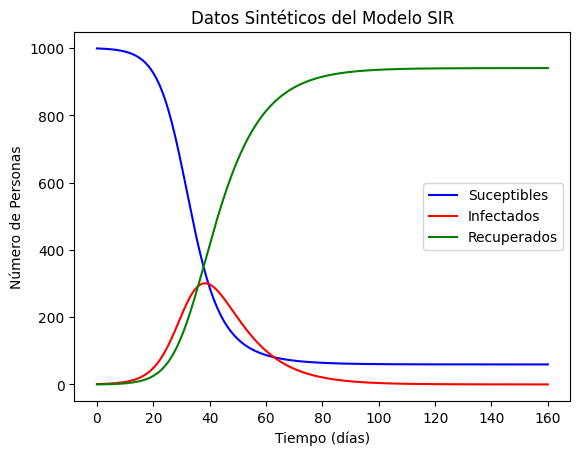

In [ ]:
import numpy as np
from scipy.integrate import odeint

# Parámetros del modelo SIR
beta = 0.3  # Tasa de transmisión (infección)
gamma = 0.1  # Tasa de recuperación

# Condiciones iniciales
I0 = 1  # Número inicial de infectados
R0 = 0  # Número inicial de recuperados
S0 = 999  # Número inicial de susceptibles
N = S0 + I0 + R0  # Población total

# Modelo SIR definido por las ecuaciones diferenciales
def sir_model(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

# Generar un vector de tiempos (días)
t = np.linspace(0, 160, 260)

# Resolver el sistema de ecuaciones diferenciales
result = odeint(sir_model, [S0, I0, R0], t, args=(N, beta, gamma))
S, I, R = result.T

# Mostrar los datos generados (opcional)
import matplotlib.pyplot as plt
plt.plot(t, S, 'b', label='Suceptibles')
plt.plot(t, I, 'r', label='Infectados')
plt.plot(t, R, 'g', label='Recuperados')
plt.title('Datos Sintéticos del Modelo SIR')
plt.xlabel('Tiempo (días)')
plt.ylabel('Número de Personas')
plt.legend()
plt.show()


Parámetros estimados:
Beta (tasa de infección): 0.295398135684814
Gamma (tasa de recuperación): 0.09768937323208397


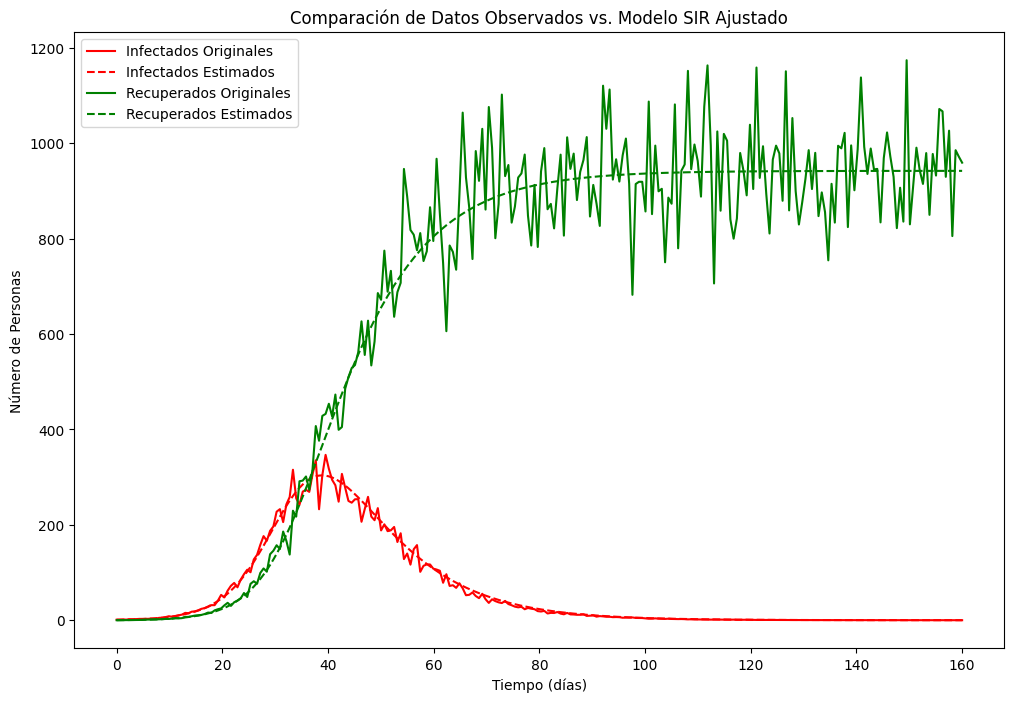

In [ ]:
from scipy.optimize import minimize
# Función de costo para optimización
def cost_function(params, data, t, N):
    beta, gamma = params
    I, R = data
    sol = odeint(sir_model, [N - I[0] - R[0], I[0], R[0]], t, args=(N, beta, gamma))
    return np.sum((sol[:,1] - I)**2 + (sol[:,2] - R)**2)

# Datos observados
# Agregar error gaussiano a los datos (simulando imprecisión en la medición)
error_std_I = 0.1  # Desviación estándar del error en los infectados
error_std_R = 0.1  # Desviación estándar del error en los recuperados
I_observed = I * (1 +np.random.normal(0, error_std_I, I.shape))
R_observed = R *(1 + np.random.normal(0, error_std_R, R.shape))
observed_data = (I_observed, R_observed)

# Estimación inicial
initial_guess = [0.1, 0.1]

# Optimización
result = minimize(cost_function, initial_guess, args=(observed_data, t, N), method='Nelder-Mead', bounds=[(0.001, 1), (0.001, 1)])
estimated_beta, estimated_gamma = result.x

# Simular con parámetros estimados para la comparación
estimated_params = odeint(sir_model, [S0, I0, R0], t, args=(N, estimated_beta, estimated_gamma))
S_est, I_est, R_est = estimated_params.T

# Mostrar los resultados
print("Parámetros estimados:")
print("Beta (tasa de infección):", estimated_beta)
print("Gamma (tasa de recuperación):", estimated_gamma)

# Graficar los datos generados y los ajustados
plt.figure(figsize=(12, 8))
plt.plot(t, I_observed, 'r', label='Infectados Originales')
plt.plot(t, I_est, 'r--', label='Infectados Estimados')
plt.plot(t, R_observed, 'g', label='Recuperados Originales')
plt.plot(t, R_est, 'g--', label='Recuperados Estimados')
plt.title('Comparación de Datos Observados vs. Modelo SIR Ajustado')
plt.xlabel('Tiempo (días)')
plt.ylabel('Número de Personas')
plt.legend()
plt.show()
